In [1]:
import os
import sys

sys.path.insert(0, os.path.abspath(os.path.join(os.path.abspath(''), '..')))

In [2]:
import threatmodel as tm
import threatmodel.plus as tm_plus

> Users must log in to the website before they can carry out any of the use cases.

In [3]:
model = tm.Model("REST Login Model")
user = tm_plus.Browser(model, "User")

In [4]:
web_api = tm.Process(
    model,
    "WebApi",
    machine=tm.Machine.VIRTUAL,
    technology=tm.Technology.WEB_SERVICE_REST,
)

login = tm.DataFlow(
    model,
    "Login",
    user,
    web_api,
    protocol=tm.Protocol.HTTPS,
)

login.sends(tm.Data("LoginRequest"))
login.receives(tm.Data("LoginResponse"))

In [5]:
database = tm.DataStore(
    model,
    "Database",
    machine=tm.Machine.VIRTUAL,
    technology=tm.Technology.DATABASE,
)

authenticate= tm.DataFlow(
    model,
    "Authenticate",
    web_api,
    database ,
    protocol=tm.Protocol.SQL,
)

authenticate.sends(tm.Data("AuthenticateUserQuery"))
authenticate.receives(tm.Data("AuthenticateUserQueryResult"))

In [6]:
result = model.evaluate()

print(result.risks_table())

SID               Severity    Category                    Name              Affected    Treatment
----------------  ----------  --------------------------  ----------------  ----------  -----------
CAPEC-100@WebApi  high        Manipulate Data Structures  Overflow Buffers  WebApi      unchecked
CAPEC-66@WebApi   elevated    Inject Unexpected Items     SQL Injection     WebApi      unchecked


> Is there a suitable mitigation?

In [7]:
print(result.get_threat_by_id("CAPEC-100"))

CAPEC-100: Overflow Buffers

Description:
Buffer Overflow attacks target improper or missing bounds checking on buffer operations, typically triggered by input injected by an adversary. As a consequence, an adversary is able to write past the boundaries of allocated buffer regions in memory, causing a program crash or potentially redirection of execution as per the adversaries' choice.

Prerequisites:
- Targeted software performs buffer operations.
- Targeted software inadequately performs bounds-checking on buffer operations.
- Adversary has the capability to influence the input to buffer operations.

Mitigations:
- Use a language or compiler that performs automatic bounds checking.
- Use secure functions not vulnerable to buffer overflow.
- If you have to use dangerous functions, make sure that you do boundary checking.
- Compiler-based canary mechanisms such as StackGuard, ProPolice and the Microsoft Visual Studio /GS flag. Unless this provides automatic bounds checking, it is not a

> Is there a suitable security control?

In [8]:
tm.Control.list

['BOUNDS_CHECKING: Bounds Checking',
 'INPUT_SANITIZING: Input Sanitizing',
 'INPUT_VALIDATION: Input Validation',
 'PARAMETERIZATION: Parameterization',
 'AVOID_SERVER_SIDE_INCLUDES: Avoid Server-Side Includes (SSI)',
 'AVOID_USING_COMMAND_INTERPRETERS: Avoid Using Command Interpreters',
 'WAF: waf']

> After many long meetings, we decided to accept the risk :)

In [9]:
result.treat_risk("CAPEC-100@WebApi", tm.Treatment.ACCEPTED)

print(result.risks_table())

SID               Severity    Category                    Name              Affected    Treatment
----------------  ----------  --------------------------  ----------------  ----------  -----------
CAPEC-100@WebApi  high        Manipulate Data Structures  Overflow Buffers  WebApi      accepted
CAPEC-66@WebApi   elevated    Inject Unexpected Items     SQL Injection     WebApi      unchecked


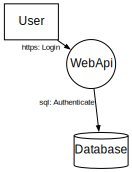

In [10]:
result.data_flow_diagram()